# Linear regression

We wish to solve $Ax=b$ where $A \in \mathbb{R}^{m\times n}$, $x \in \mathbb{R}^{n\times 1}$, $b \in \mathbb{R}^{m\times 1}$. 

i.e. we wish to best satisfy the solution that solves m equations with n unknowns.

However, when $m > n$ there is typically not an exact solution so we use the "Least Squares" method.

This method can be derived two ways:

(1) geometrically as a projection, p, of vector b onto vector a:

i.e. $a \cdot (b - p) = a^Tb - a^Tp = 0$
and $p=\hat{x}a$

so $a^Ta\hat x = a^Tb$ which generalises to the matrix form.

(2) take the derivative w.r.t the parameters:

$\mathcal{L} = min||b - A\hat x||^2 = (b - A\hat x)^T(b - A\hat x)$

$\frac{d\mathcal{L}}{d\hat x} = -2b^TA + 2(A\hat x)^T A = 0$

move $b^TA$ to one side then transpose both sides gives the normal equation: 

$A^TA\hat x = A^Tb$

The shortcut to get there is to attach an $A^T$ on each side:

$A^TA \hat x = A^Tb$

In [46]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
class LinearRegressionNumpy():
    def __init__(self, intercept=True):
        self.params_ = 0
        self.intercept = intercept
        
    def train(self, X, b):
        if self.intercept:
            A = np.concatenate([np.ones((len(X),1)),X], axis=1)
        else:
            A = X
            
        self.params_ = A.T @ b @ np.linalg.inv(A.T @ A)
    
    def predict(self, X):
        if self.intercept:
            A = np.concatenate([np.ones((len(X),1)),X], axis=1)
        else:
            A = X

        y_pred = A @  self.params_
        return y_pred

In [48]:
# define data
np.random.seed(14)
n_features = 1
X, y = make_regression(n_samples=200, n_features=n_features, n_informative=n_features)
X += np.random.normal(0,0.5,X.shape)

In [49]:
# model from scratch
reg = LinearRegressionNumpy()
reg.train(X, y)
x_pred = np.linspace(-3,3, 200).reshape(-1,1)
y_pred = reg.predict(x_pred)

In [50]:
# model from sklearn
reg2 = LinearRegression().fit(X, y)
reg2_params = np.array([reg2.intercept_, reg2.coef_[0]])

In [51]:
# check parameters are close
assert (np.round(reg.params_,12) == np.round(reg2_params,12)).all()

[Text(0.5, 1.0, 'sklearn')]

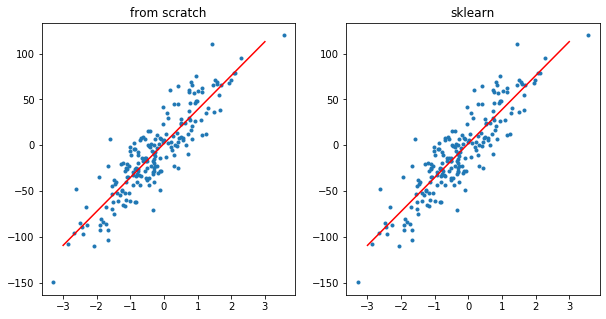

In [53]:
# plot comparison
f, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(X, y, '.')
ax[0].plot(x_pred, y_pred, 'r')
ax[0].set(title='from scratch')

ax[1].plot(X, y, '.')
ax[1].plot(x_pred, reg2.predict(x_pred), 'r')
ax[1].set(title='sklearn')